<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-Load-Data" data-toc-modified-id="Import-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and Load Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Trying-Out-Models" data-toc-modified-id="Trying-Out-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying Out Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)" data-toc-modified-id="Decision-Trees-(Random-Forest,-Gradient-Boosting,-XGBoost)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Trees (Random Forest, Gradient Boosting, XGBoost)</a></span></li><li><span><a href="#Other-Models-(e.g.-Bagging-Classifier)" data-toc-modified-id="Other-Models-(e.g.-Bagging-Classifier)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Other Models (e.g. Bagging Classifier)</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></div>

## Import and Load Data

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

In [2]:
#!pip install xgboost

In [3]:
#load in your data

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv("loans.csv", index_col=None)

/var/folders/zd/yvpsjw1553lghwz7d57ppfnc0000gn/T/ipykernel_65678/1520402632.py:1: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loans.csv", index_col=None)


In [6]:
df.shape

(887379, 75)

In [7]:
df.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761353
purpose                             0
title                             153
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   887379 non-null  int64  
 1   id                           887379 non-null  int64  
 2   member_id                    887379 non-null  int64  
 3   loan_amnt                    887379 non-null  int64  
 4   funded_amnt                  887379 non-null  int64  
 5   funded_amnt_inv              887379 non-null  float64
 6   term                         887379 non-null  object 
 7   int_rate                     887379 non-null  float64
 8   installment                  887379 non-null  float64
 9   grade                        887379 non-null  object 
 10  sub_grade                    887379 non-null  object 
 11  emp_title                    835917 non-null  object 
 12  emp_length                   842554 non-null  object 
 13 

In [9]:
df.shape

(887379, 75)

In [10]:
#df.hist(figsize=[30,30])

In [11]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379.000000,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,443690.000000,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,256164.396598,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,1.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,221845.500000,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,443690.000000,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12

## Preprocessing

 - Handle missing values
 - Encode categorical variables, scale data (if you wish), feature selection, etc.
 - Split the dataset into features (X) and target variable (y)
 - Split into training and testing sets

In [12]:
len(df.columns)

75

In [13]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [14]:
df.loan_status.isna().any()

False

In [15]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [16]:
df.loan_status.value_counts()

loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [17]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off',"Late (31-120 days)","Default","Late (16-30 days)"])]

In [18]:
df["loan_type"] = df.loan_status.apply(lambda x: 1 if "Fully Paid" in x else 0)

In [19]:
df.loan_status.value_counts()

loan_status
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Late (16-30 days)       2357
Default                 1219
Name: count, dtype: int64

In [20]:
df.head(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_type
0,1,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [21]:
df.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       14961
emp_length                      10829
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           178415
purpose                             0
title                              14
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

Dropping columns with 50% of missing values

In [22]:
threshold = len(df)* 0.5     

In [23]:
df.dropna(thresh = threshold, axis = 1, inplace = True)

In [24]:
len(df.columns)

54

In [25]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_type'],
      dtype='object')

In [26]:
df.isna().sum()[df.isna().sum()!=0]

emp_title                     14961
emp_length                    10829
title                            14
revol_util                      211
last_pymnt_d                    697
last_credit_pull_d               22
collections_12_mths_ex_med       56
tot_coll_amt                  63874
tot_cur_bal                   63874
total_rev_hi_lim              63874
dtype: int64

In [27]:
# Dropping rows with less NaNs
columns_few_nans = ['title','revol_util','last_credit_pull_d','collections_12_mths_ex_med'
]

# Drop rows where any of these columns are NaN
df = df.dropna(subset=columns_few_nans)

In [28]:
df.shape

(267835, 54)

In [29]:
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_type
0,1,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
1,2,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
2,3,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1


In [30]:
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    266002
1.0      1707
2.0       108
3.0        13
4.0         3
6.0         1
5.0         1
Name: count, dtype: int64

In [31]:
df.zip_code.nunique()

888

In [32]:
df.addr_state.nunique()

51

In [33]:
df.pymnt_plan.value_counts()

pymnt_plan
n    267828
y         7
Name: count, dtype: int64

In [34]:
df.initial_list_status.value_counts()

initial_list_status
f    190007
w     77828
Name: count, dtype: int64

In [35]:
df.policy_code.value_counts()

policy_code
1    267835
Name: count, dtype: int64

In [36]:
df.application_type.value_counts()

application_type
INDIVIDUAL    267832
JOINT              3
Name: count, dtype: int64

In [37]:
df['term'] = df['term'].apply(lambda x: 36 if '36' in x else 60)

In [38]:
df.term.value_counts()

term
36    205627
60     62208
Name: count, dtype: int64

In [39]:
df.emp_length.isna().sum()

10819

In [40]:
#reducing home_ownership feature values
df.home_ownership.value_counts()

home_ownership
MORTGAGE    131325
RENT        112799
OWN          23530
OTHER          139
NONE            41
ANY              1
Name: count, dtype: int64

In [41]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'

In [42]:
df.home_ownership.value_counts()

home_ownership
MORTGAGE    131325
RENT        112799
OWN          23530
OTHER          181
Name: count, dtype: int64

In [43]:
df.emp_length.isna().sum()

10819

In [44]:
# Checking contribution of emp_length column to the model

pivot_table = df.pivot_table(index='emp_length', columns='loan_status', aggfunc='size', fill_value=0)
# Normalize the counts row-wise to get percentages
pivot_table_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)

print(pivot_table_normalized)

loan_status  Charged Off   Default  Fully Paid  Late (16-30 days)  \
emp_length                                                          
1 year          0.165686  0.005323    0.777217           0.008293   
10+ years       0.161176  0.004594    0.782528           0.008464   
2 years         0.161824  0.003456    0.783886           0.008479   
3 years         0.163563  0.004817    0.779600           0.008755   
4 years         0.162351  0.003867    0.785388           0.009081   
5 years         0.168803  0.004062    0.782824           0.008282   
6 years         0.173543  0.004061    0.776367           0.006704   
7 years         0.175155  0.004783    0.772366           0.007747   
8 years         0.171067  0.005806    0.770479           0.008748   
9 years         0.174371  0.004819    0.765244           0.010818   
< 1 year        0.173427  0.004015    0.766659           0.010151   

loan_status  Late (31-120 days)  
emp_length                       
1 year                 0.043481  


In [45]:
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [46]:
from sklearn.preprocessing import OrdinalEncoder

# Create the encoder instance
encoder = OrdinalEncoder(categories=[['G','F','E','D', 'C', 'B', 'A']])

# Fit and transform the data
df['grade'] = encoder.fit_transform(df[['grade']])

In [47]:
encoder = OrdinalEncoder()
# Encode the 'grade' column
df['initial_list_status'] = encoder.fit_transform(df[['initial_list_status']])

In [48]:
df.corr(numeric_only=True)['loan_type'].sort_values(ascending=False)   #shall drop highly correlated columns and keep only 1

loan_type                     1.000000
total_rec_prncp               0.491625
last_pymnt_amnt               0.418966
total_pymnt                   0.389083
total_pymnt_inv               0.386735
grade                         0.255341
tot_cur_bal                   0.077857
total_rev_hi_lim              0.056668
annual_inc                    0.055791
total_acc                     0.026921
revol_bal                     0.002368
tot_coll_amt                  0.001284
acc_now_delinq               -0.013914
pub_rec                      -0.018964
collections_12_mths_ex_med   -0.019252
open_acc                     -0.025525
initial_list_status          -0.034643
delinq_2yrs                  -0.035419
inq_last_6mths               -0.049337
installment                  -0.058043
total_rec_int                -0.065307
loan_amnt                    -0.074777
funded_amnt_inv              -0.074828
funded_amnt                  -0.075226
Unnamed: 0                   -0.081267
id                       

In [49]:
df.shape

(267835, 54)

As per the above analysis dropping the following types of columns:
1. Post loan has been granted
2. Highly correlated features (kept one dropped others)
3. Features with less variability, as they will not contribute to the model much
4. Too many values to contribute to the model

In [50]:
df.drop(columns = ['out_prncp_inv', 'total_pymnt_inv','emp_length','issue_d','earliest_cr_line',
                'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_credit_pull_d','id','url','title','sub_grade','zip_code',
                   'policy_code','initial_list_status','application_type','Unnamed: 0','member_id','emp_title',
                   'collections_12_mths_ex_med','last_pymnt_amnt',
                   'issue_d','out_prncp','total_rec_late_fee','out_prncp','total_pymnt','tot_coll_amt']
                   ,inplace = True) 

In [51]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'acc_now_delinq',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_type'],
      dtype='object')

In [52]:
df.shape

(267835, 26)

In [53]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,loan_type
0,5000,5000,4975.0,36,10.65,162.87,5.0,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,NaN,NaN,1
1,2500,2500,2500.0,60,15.27,59.83,4.0,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,NaN,NaN,0
2,2400,2400,2400.0,36,15.96,84.33,4.0,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,NaN,NaN,1
3,10000,10000,10000.0,36,13.49,339.31,4.0,RENT,49200.0,Source Verified,Fully Paid,n,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,NaN,NaN,1
5,5000,5000,5000.0,36,7.90,156.46,6.0,RENT,36000.0,Source Verified,Fully Paid,n,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,NaN,NaN,1


In [54]:
df.isna().sum()[df.isna().sum()!=0]

tot_cur_bal         63725
total_rev_hi_lim    63725
dtype: int64

In [55]:
# Columns to fill with their median values
columns_to_fill = ['tot_cur_bal', 'total_rev_hi_lim']

# Fill missing values for each column with its median
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].median())

In [56]:
df.shape

(267835, 26)

In [57]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [58]:
df.isna().sum().sum()

0

In [59]:
df.shape

(267835, 26)

In [60]:
df.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,loan_type
0,5000,5000,4975.0,36,10.65,162.87,5.0,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,78975.5,22100.0,1


In [61]:
X = df.drop(columns = ['loan_status','loan_type'], axis = 1)

In [62]:
y = df.loan_type

In [63]:
# drop the different value in target - current and issued..

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X_train.shape

(187484, 24)

In [66]:
X_test.shape

(80351, 24)

In [67]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool', 'category']).columns

In [68]:
numerical_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [69]:
categorical_cols

Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object')

## Feature Selection Strategies

**Setting up ColumnTransformer**

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')),  # Imputing with the mean
    ('scaler', StandardScaler())  # Scaling the data
])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy="constant", fill_value="unknown")), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
])

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Leave remaining columns untouched
)

**Select From Model and Check Logistic Regression**

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#build SelectFromModel here
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = 'median')

# Create a pipeline with preprocessing and the logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', select),
    ('log_reg',LogisticRegression(max_iter=10000))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'tot_cur_bal', 'total_r...i_lim'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                                 threshold='median')),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [73]:
support_mask = model_pipeline.named_steps['feature_selection'].get_support()
# Transform a single row to get the feature names after preprocessing
X_transformed = model_pipeline.named_steps['preprocessor'].transform(X_train[:1])

# If your preprocessor supports `get_feature_names_out()`
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Apply the mask to these names
selected_features = feature_names[support_mask]
print("Selected Features:", selected_features)

Selected Features: ['num__loan_amnt' 'num__funded_amnt' 'num__funded_amnt_inv' 'num__term'
 'num__int_rate' 'num__installment' 'num__grade' 'num__annual_inc'
 'num__dti' 'num__delinq_2yrs' 'num__inq_last_6mths' 'num__open_acc'
 'num__pub_rec' 'num__revol_bal' 'num__revol_util' 'num__total_acc'
 'num__tot_cur_bal' 'num__total_rev_hi_lim' 'cat__home_ownership_MORTGAGE'
 'cat__home_ownership_OWN' 'cat__home_ownership_RENT'
 'cat__verification_status_Not Verified'
 'cat__verification_status_Source Verified'
 'cat__verification_status_Verified' 'cat__purpose_credit_card'
 'cat__purpose_debt_consolidation' 'cat__purpose_home_improvement'
 'cat__purpose_other' 'cat__purpose_small_business' 'cat__addr_state_AZ'
 'cat__addr_state_CA' 'cat__addr_state_CO' 'cat__addr_state_FL'
 'cat__addr_state_GA' 'cat__addr_state_IL' 'cat__addr_state_MA'
 'cat__addr_state_MD' 'cat__addr_state_MI' 'cat__addr_state_NC'
 'cat__addr_state_NJ' 'cat__addr_state_NV' 'cat__addr_state_NY'
 'cat__addr_state_OH' 'cat__add

In [74]:
print("Selected Features form Random Forest Model Selection:")
len(selected_features)

Selected Features form Random Forest Model Selection:


47

Checking score to ensure if we have good feature selection.

In [75]:
# Predict probabilities for the positive class
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

In [76]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score RF selection: {auc_score}")

AUC Score RF selection: 0.7031086646778804


**Lasso Feature Selection** 

In [77]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model with the specified parameters
logistic_regression_l1 = LogisticRegression(
    penalty='l1',
    tol=0.0005,
    C=0.1,
    solver='saga',
    max_iter=10000,
    random_state=100
)

# Create a pipeline with preprocessing and the logistic regression model
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_regression_l1)
])

In [78]:
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=10000, penalty='l1',
                                    random_state=100, solver='saga',
                                    tol=0.0005))])

In [79]:
y_prob = lasso_pipeline.predict_proba(X_test)[:, 1]

In [80]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

AUC Score: 0.7044090123585112


## Trying Out Models

Here, you want to try each type of machine learning model and perform the train-test-loop: identify the best hyperparameters for the model to perform well in training and validation. GridSearchCV is likely relevant.

### Logistic Regression

GridSearchCV
(Using feature selection to speed up the model fitting)

In [81]:
logistic_regression_model = LogisticRegression(max_iter=10000, random_state=42, solver='saga', penalty='elasticnet')

# Updated pipeline with Elastic Net logistic regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selection',select),
    ('log_reg', logistic_regression_model)
])

In [82]:
param_grid_log = {
    'log_reg__C': [0.1, 1, 10],
    'log_reg__l1_ratio': [0,0.5,1]
}

In [83]:
grid_search_log = GridSearchCV(log_reg_pipeline, param_grid_log, cv=5, scoring='roc_auc', n_jobs=-1)

# Assuming X_train, y_train are your training data and labels
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_de...
                                                                         Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                                       ('selection',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                                                        threshold='median')),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 1, 10],
                         'log_reg__l1_ratio': [0, 0.5, 1]},
             scoring='roc_auc')

In [84]:
print("Best parameters for logistic regression:", grid_search_log.best_params_)
print("Best ROC AUC score for logistic regression:", grid_search_log.best_score_)

Best parameters for logistic regression: {'log_reg__C': 0.1, 'log_reg__l1_ratio': 0.5}
Best ROC AUC score for logistic regression: 0.7044464271517158


### Decision Trees (Random Forest, Gradient Boosting, XGBoost)

**Random Forest**

Classification using Random forest classifier without feature selection, as random forest is good at handling high-dimensional data and do not need scaling.

In [88]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Leave remaining columns untouched
)

In [89]:
rnd_clf1 = RandomForestClassifier(n_estimators=100, n_jobs = -1, random_state = 42)

# Create a pipeline with preprocessing, feature selection, and the decision tree classifier
tree_pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('random_forest', rnd_clf1)
])

In [90]:
tree_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                ('random_forest',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [91]:
y_proba = tree_pipeline1.predict_proba(X_test)[:, 1]  # Assuming the positive class is at index 1

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)

print(f'ROC AUC score for random forest: {roc_auc}')

ROC AUC score for random forest: 0.7031239427625736


In [92]:
y_pred_rf = tree_pipeline1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score for random forest: {accuracy}")

Accuracy Score for random forest: 0.7791066694876231


**GridsearchCV for Random Forest**

As best Best parameters found in the first run:  

*{'random_forest__max_depth': 30, 'random_forest__n_estimators': 300}*

with *param_grid = {
    'random_forest__n_estimators': [100, 200, 300],  
    'random_forest__max_depth': [None, 10, 20, 30],}*
    
Will adjust param_grid accordingly.

In [93]:
param_grid = {
    'random_forest__n_estimators': [250, 300, 350],  # Slightly reduced and more focused range
    'random_forest__max_depth': [15, 20, 25],  # Lower and narrower range to encourage simpler models
    'random_forest__min_samples_split': [2, 4],  # Added to control tree depth
    'random_forest__min_samples_leaf': [1, 2],  # Added to prevent overly complex models
}

# Set up the GridSearchCV object
grid_search_RF = GridSearchCV(tree_pipeline1, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

In [94]:
grid_search_RF.fit(X_train, y_train) 

/Users/ritikaverma/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                                       ('random_forest',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'random_forest__max_depth': [15, 20, 25],
                         'random_forest__min_samples_leaf': [1, 2],
                         'random_forest__min_samples_split': [2, 4],
                         'random_forest__n_estimators': [250, 300, 350]},
             scoring='roc_auc')

In [95]:
y_proba_grid_RF = grid_search_RF.predict_proba(X_test)[:, 1]  # Assuming the positive class is at index 1

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba_grid_RF)

print(f'ROC AUC score for random forest: {roc_auc}')

ROC AUC score for random forest: 0.7132317107061115


In [96]:
print("Best parameters found: ", grid_search_RF.best_params_)

# Best estimator
best_estimator = grid_search_RF.best_estimator_

Best parameters found:  {'random_forest__max_depth': 20, 'random_forest__min_samples_leaf': 2, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 350}


**GridSeacrhCV - Gradient Boosting**

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_iter_no_change=10,tol=0.01, random_state=42)

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('gradient_boosting', gbrt)
])

In [98]:
param_grid_GB = {
    'gradient_boosting__max_depth': [1,2,3],  # Exploring depths around the initial value
    'gradient_boosting__n_estimators': [200,300],  # Number of boosting stages to be run
    'gradient_boosting__learning_rate': [0.1, 0.5 ,1],  # Shrinks the contribution of each tree
}

In [99]:
from sklearn.model_selection import GridSearchCV

# Setup GridSearchCV
grid_search_GB = GridSearchCV(tree_pipeline, param_grid_GB, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Assuming X_train, y_train are your training data and labels
grid_search_GB.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                                       ('gradient_boosting',
                                        GradientBoostingClassifier(n_iter_no_change=10,
                                                                   random_state=42,
                                                                   tol=0.01))]),
             n_jobs=-1,
             param_grid={'gradient_boosting__learning_rate': [0.1, 0.5, 1],
                         'gradient_boosting__max_depth': [1, 2, 3],
                         'gradient_boosting__n_estimators': [200, 300]},
             scoring='roc_auc', verbose=1)

In [100]:
print("Best parameter for gradient boosting:", grid_search_GB.best_params_)
print("Best score gradient boosting:", grid_search_GB.best_score_)

Best parameter for gradient boosting: {'gradient_boosting__learning_rate': 0.5, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 200}
Best score gradient boosting: 0.7077409226154497


Trying with more parameters to find if there is some better hyperparameter.

In [101]:
param_grid_GB1 = {
    'gradient_boosting__max_depth': [2,3,4],  # Exploring depths around the initial value
    'gradient_boosting__n_estimators': [180,200,220],  # Number of boosting stages to be run
    'gradient_boosting__learning_rate': [0.45, 0.5, 0.55],  # Shrinks the contribution of each tree
}

from sklearn.model_selection import GridSearchCV

# Setup GridSearchCV
grid_search_GB1 = GridSearchCV(tree_pipeline, param_grid_GB1, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Assuming X_train, y_train are your training data and labels
grid_search_GB1.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                                       ('gradient_boosting',
                                        GradientBoostingClassifier(n_iter_no_change=10,
                                                                   random_state=42,
                                                                   tol=0.01))]),
             n_jobs=-1,
             param_grid={'gradient_boosting__learning_rate': [0.45, 0.5, 0.55],
                         'gradient_boosting__max_depth': [2, 3, 4],
                         'gradient_boosting__n_estimators': [180, 200, 220]},
             scoring='roc_auc', verbose=1)

In [102]:
print("Best parameter for gradient boosting:", grid_search_GB1.best_params_)
print("Best score gradient boosting:", grid_search_GB1.best_score_)

Best parameter for gradient boosting: {'gradient_boosting__learning_rate': 0.5, 'gradient_boosting__max_depth': 4, 'gradient_boosting__n_estimators': 180}
Best score gradient boosting: 0.7100041068241627


**XGBoost**

In [109]:
from sklearn.feature_selection import SelectFromModel

xgb_clf = XGBClassifier(random_state=42)

# Create a pipeline
XGBoost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('xgb_classifier', xgb_clf)
])

In [110]:
XGBoost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                ('xgb_classifier',
                 XGBClassifier(base_score=None, booster=None, cal...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [111]:
# Predict probabilities for the positive class
y_proba = XGBoost_pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)

print(f'ROC AUC score: {roc_auc}')

ROC AUC score: 0.7126377089961942


**XGBoost - GridSearchCV**

In [182]:
param_grid_xgb = {
    'xgb_classifier__learning_rate': [0.01,0.05],
    'xgb_classifier__n_estimators': [300,500],
    'xgb_classifier__max_depth': [3, 6],
    'xgb_classifier__subsample': [0.7, 0.8],
    'xgb_classifier__gamma': [0, 0.1],
    'xgb_classifier__reg_alpha': [0, 0.1],
    'xgb_classifier__reg_lambda': [1, 0.1],
}

grid_search_xgb = GridSearchCV(XGBoost_pipeline, param_grid_xgb, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

In [183]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                                       ('xgb_classifier',
                                        XGBClassifier(base...
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb_classifier__gamma': [0, 0.1],
                         'xgb_classifier__learning_rate': [0.01, 0.05],
                         'xgb_classifier__max_depth': [3, 6],
                         'xgb_classifier__n_estimators': [300, 500],
                         'xgb_classifier__reg_alpha': [0, 0.1],
                         'xgb_classifier__reg_lambda': [1, 0.1],
                         'xgb_classifier__subsample': [0.7, 0.8]},
             scoring='roc_auc', verbose=1)

In [184]:
print("Best parameters using XGBoost:", grid_search_xgb.best_params_)
print("Best score XGBoost:", grid_search_xgb.best_score_)

Best parameters using XGBoost: {'xgb_classifier__gamma': 0.1, 'xgb_classifier__learning_rate': 0.05, 'xgb_classifier__max_depth': 6, 'xgb_classifier__n_estimators': 500, 'xgb_classifier__reg_alpha': 0.1, 'xgb_classifier__reg_lambda': 1, 'xgb_classifier__subsample': 0.8}
Best score XGBoost: 0.7200863647339133


### Other Models (e.g. Bagging Classifier)

**Decision Tree Classifier with Baggin** - Even though it is similar to RandomForestClassifier, still trying for checking on performance.

In [124]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_jobs=-1,
    random_state=42
)

bagging_pipeline = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('bagging_classifier', bag_clf)  
])

In [125]:
param_grid_bag = {
    'bagging_classifier__n_estimators': [100, 500],
    'bagging_classifier__max_samples': [100, 200],
    # Example: To tune the base estimator's max_depth
    'bagging_classifier__estimator__max_depth': [None, 10, 20],
}

In [126]:
grid_search_bag = GridSearchCV(
    bagging_pipeline,
    param_grid_bag,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

In [127]:
grid_search_bag.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state'],
      dtype='object'))])),
                                       ('bagging_classifier',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                          n_jobs=-1,
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'bagging_classifier__estimator__max_depth': [None, 10,
                                                                      20],
                         'bagging_classifier__max_samples': [100, 200],
                         'bagging_classifier__n_estimators': [100, 500]},
             scoring='roc_auc')

In [128]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class
y_prob = grid_search_bag.predict_proba(X_test)[:, 1]

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Best ROC AUC Score: {roc_auc}")

Best ROC AUC Score: 0.6937386530060323


In [129]:
print("Best parameters:", grid_search_bag.best_params_)

Best parameters: {'bagging_classifier__estimator__max_depth': 10, 'bagging_classifier__max_samples': 200, 'bagging_classifier__n_estimators': 500}


**Logistic Regression with bagging 
GridSearchCV**: - Logistic Regression with bagging (adjusting Logistic regression as per the best parameters selected we found earlier.

In [130]:
log_reg_fs = LogisticRegression(penalty='l1',
    tol=0.01,
    C=10,
    solver='saga',
    max_iter=10000,
    random_state=42
)
bagging_clf = BaggingClassifier(estimator=log_reg_fs, n_estimators = 500,
                           max_samples=100, random_state=42)

pipeline_bag_lr = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('bagging_classifier', bagging_clf)   # Bagging with logistic regression
])

In [131]:
param_grid_bag_lr = {
    'bagging_classifier__n_estimators': [10, 20, 50],
    'bagging_classifier__max_samples': [0.5, 0.75, 1.0],
    # Add more parameters here
}
grid_search_bag_lr = GridSearchCV(pipeline_bag_lr, param_grid_bag_lr, cv=5, scoring='roc_auc',n_jobs=-1)

In [132]:
grid_search_bag_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_de...
      dtype='object'))])),
                                       ('bagging_classifier',
                                        BaggingClassifier(estimator=LogisticRegression(C=10,
                                                                                       max_iter=10000,
                                                                                       penalty='l1',
                                                                                       random_state=42,
                                                                                       solver='saga',
                                                                                       tol=0.01),
                                                          max_samples=100,
                                                          n_estimators=500,
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'bagging_classifier__max_samples': [0.5, 0.75, 1.0],
                         'bagging_classifier__n_estimators': [10, 20, 50]},
             scoring='roc_auc')

In [133]:
print("Best parameters:", grid_search_bag_lr.best_params_)
print("Best score: ", grid_search_bag_lr.best_score_)

Best parameters: {'bagging_classifier__max_samples': 1.0, 'bagging_classifier__n_estimators': 50}
Best score:  0.7051913809184444


## Model Evaluation

Compare the best models' performance on the test data. Which one does the best? Which one the worst? Why do you think this is the case?

As we need to find the best model to predict who should be given
a loan, i.e., determine who will repay in full (or some other criteria you may choose for a good
loan). We shall focus on:

Minimizing False Negatives (FN) could be crucial because failing to identify a loan that won't be repaid could be costlier than mistakenly identifying a loan that will be repaid. However, minimizing False Positives (FP) is also important to avoid missing out on potential good loans. Therefore, a balance between these errors, along with high True Positives (TP) and True Negatives (TN), indicates a better model.

Confusion Matrix:
1. True Positives (TP): Loans correctly predicted to be repaid in full.
2. True Negatives (TN): Loans correctly predicted not to be repaid in full.
3. False Positives (FP): Loans incorrectly predicted to be repaid in full (Type I error).
4. False Negatives (FN): Loans incorrectly predicted not to be repaid in full (Type II error).

**Logistic Regression** (best parameters)

In [134]:
# Predictions
y_pred_lr = grid_search_log.predict(X_test)
y_proba_lr = grid_search_log.predict_proba(X_test)[:, 1] 

In [135]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix)

Confusion Matrix for Logistic Regression:
 [[ 1978 16125]
 [ 1609 60639]]


In [136]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.7792933504250102


In [137]:
precision = precision_score(y_test, y_pred_lr)
print("Precision Score:", precision)


Precision Score: 0.7899405971549164


In [138]:
roc_auc = roc_auc_score(y_test, y_proba_lr)

# Print the ROC AUC Score
print(f"ROC AUC score for Logistic Regression: {roc_auc}")

ROC AUC score for Logistic Regression: 0.7031540680946751


In [139]:
class_report = classification_report(y_test, y_pred_lr,target_names=['Not Fully Paid', 'Fully Paid'])
print("Classification Report:\n", class_report)

Classification Report:
                 precision    recall  f1-score   support

Not Fully Paid       0.55      0.11      0.18     18103
    Fully Paid       0.79      0.97      0.87     62248

      accuracy                           0.78     80351
     macro avg       0.67      0.54      0.53     80351
  weighted avg       0.74      0.78      0.72     80351



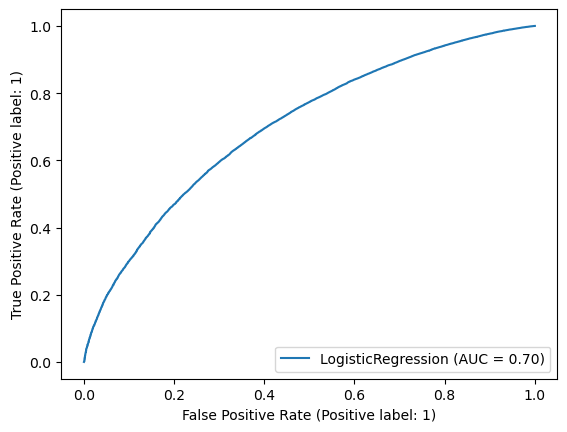

In [140]:
RocCurveDisplay.from_predictions(y_test, y_proba_lr, name="LogisticRegression")

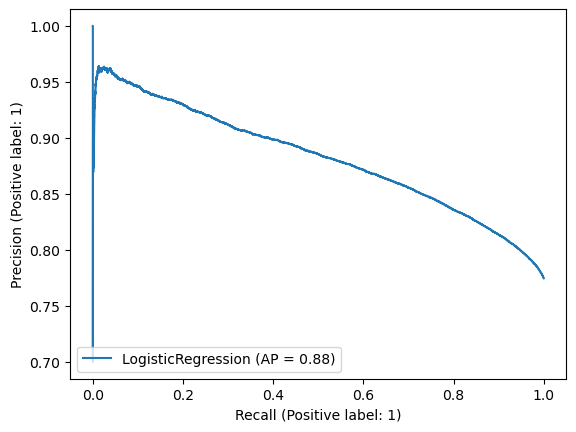

In [141]:
PrecisionRecallDisplay.from_predictions(y_test, y_proba_lr, name="LogisticRegression")

**Random Forest** (best parameters)

In [142]:
# Make predictions
y_pred_RF = grid_search_RF.predict(X_test)
# Predict probabilities for the positive class
y_pred_proba_RF = grid_search_RF.predict_proba(X_test)[:, 1]


In [143]:
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix for Random Forest with best hyperparametes:\n", conf_matrix_RF)

Confusion Matrix for Random Forest with best hyperparametes:
 [[ 1292 16811]
 [  903 61345]]


In [144]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy Score for Random Forest:", accuracy_RF)

Accuracy Score for Random Forest: 0.7795422583415266


In [145]:
precision_RF = precision_score(y_test, y_pred_RF)
print("Precision Score for Random Forest:", precision_RF)

Precision Score for Random Forest: 0.7849045498746098


In [146]:
roc_auc = roc_auc_score(y_test, y_pred_proba_RF)

# Print the ROC AUC Score
print(f"ROC AUC score for Random Forest: {roc_auc}")

ROC AUC score for Random Forest: 0.7132317107061115


In [147]:
class_report_RF = classification_report(y_test, y_pred_RF,target_names=['Not Fully Paid', 'Fully Paid'])
print("Classification Report for Random Forest:\n", class_report_RF)

Classification Report for Random Forest:
                 precision    recall  f1-score   support

Not Fully Paid       0.59      0.07      0.13     18103
    Fully Paid       0.78      0.99      0.87     62248

      accuracy                           0.78     80351
     macro avg       0.69      0.53      0.50     80351
  weighted avg       0.74      0.78      0.71     80351



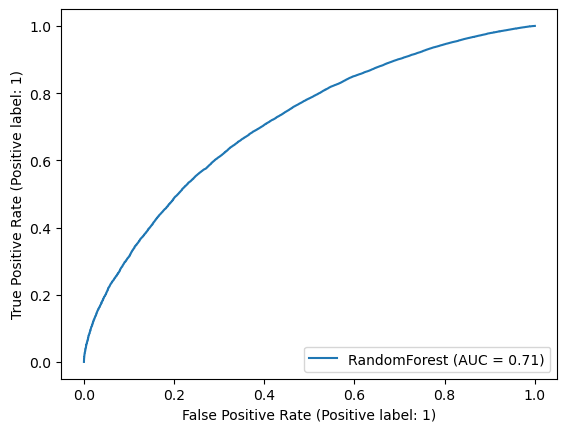

In [148]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba_RF, name="RandomForest")


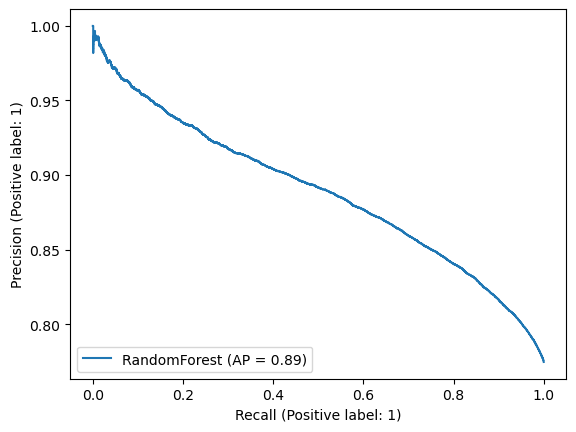

In [149]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_RF, name="RandomForest")

**Gradient Boosting** (best parameters)

In [150]:
# Make predictions
y_pred_GB1 = grid_search_GB1.predict(X_test)
# Predict probabilities for the positive class
y_pred_proba_GB1 = grid_search_GB1.predict_proba(X_test)[:, 1]


In [151]:
accuracy_GB1 = accuracy_score(y_test, y_pred_GB1)
print("Accuracy Score:", accuracy_GB1)

Accuracy Score: 0.7796916030914364


In [152]:
precision_GB1 = precision_score(y_test, y_pred_GB1)
print("Precision Score:", precision_GB1)

Precision Score: 0.7903457086244655


In [153]:
recall_GB1 = recall_score(y_test, y_pred_GB1)
print("Recall Score:", recall_GB1)

Recall Score: 0.9739911322452127


In [154]:
f1_GB1 = f1_score(y_test, y_pred_GB1)
print("F1 Score:", f1_GB1)

F1 Score: 0.8726108232584916


In [155]:
roc_auc = roc_auc_score(y_test, y_pred_proba_GB1)

# Print the ROC AUC Score
print(f"ROC AUC score for Gradient Boosting: {roc_auc}")

ROC AUC score for Gradient Boosting: 0.7095976470139812


In [156]:
# Confusion Matrix
conf_matrix_GB1 = confusion_matrix(y_test, y_pred_GB1)
print("Confusion Matrix for Gradient Boosting:\n", conf_matrix_GB1)

Confusion Matrix for Gradient Boosting:
 [[ 2020 16083]
 [ 1619 60629]]


In [157]:
class_report_GB1 = classification_report(y_test, y_pred_GB1,target_names=['Not Fully Paid', 'Fully Paid'])
print("Classification Report:\n", class_report_GB1)

Classification Report:
                 precision    recall  f1-score   support

Not Fully Paid       0.56      0.11      0.19     18103
    Fully Paid       0.79      0.97      0.87     62248

      accuracy                           0.78     80351
     macro avg       0.67      0.54      0.53     80351
  weighted avg       0.74      0.78      0.72     80351



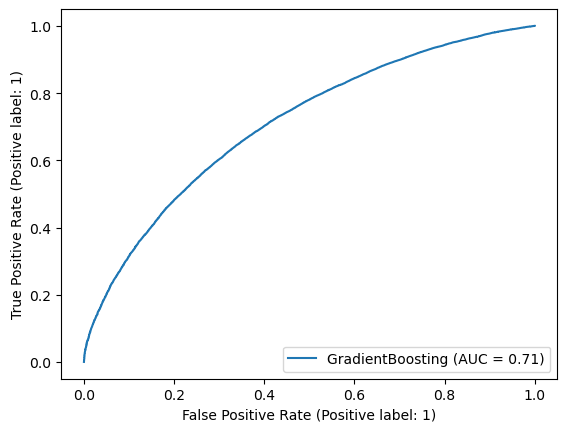

In [158]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba_GB1, name="GradientBoosting")


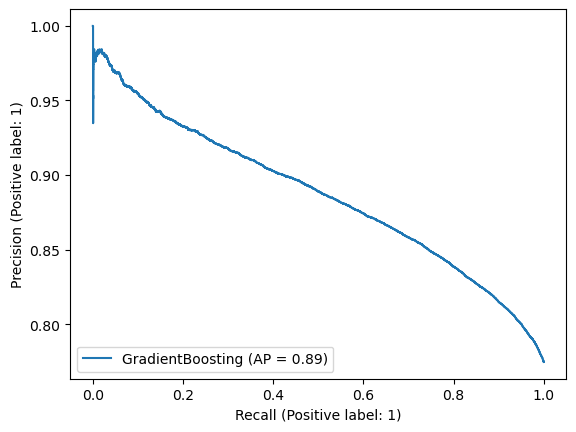

In [159]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_GB1, name="GradientBoosting")

**XGBoost** (best parameters)

In [185]:
y_pred_xgb = grid_search_xgb.predict(X_test)
y_pred_proba_xgb = grid_search_xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:\n", conf_matrix_xgb)


Confusion Matrix for XGBoost:
 [[ 2307 15796]
 [ 1776 60472]]


In [186]:
# Accuracy Score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy Score:", accuracy_xgb)

Accuracy Score: 0.7813095045487922


In [187]:
# Precision Score
precision_xgb = precision_score(y_test, y_pred_xgb)
print("Precision Score:", precision_xgb)

Precision Score: 0.7928882362196465


In [188]:
# Recall Score
recall_xgb = recall_score(y_test, y_pred_xgb)
print("Recall Score:", recall_xgb)

Recall Score: 0.9714689628582445


In [189]:
# F1 Score
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1 Score:", f1_xgb)

F1 Score: 0.873141008980912


In [190]:
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# Print the ROC AUC Score
print(f"ROC AUC score for XGBoost: {roc_auc}")

ROC AUC score for XGBoost: 0.718885441975658


In [191]:
# Classification Report
class_report_xgb = classification_report(y_test, y_pred_xgb,target_names=['Not Fully Paid', 'Fully Paid'])
print("Classification Report:\n", class_report_xgb)

Classification Report:
                 precision    recall  f1-score   support

Not Fully Paid       0.57      0.13      0.21     18103
    Fully Paid       0.79      0.97      0.87     62248

      accuracy                           0.78     80351
     macro avg       0.68      0.55      0.54     80351
  weighted avg       0.74      0.78      0.72     80351



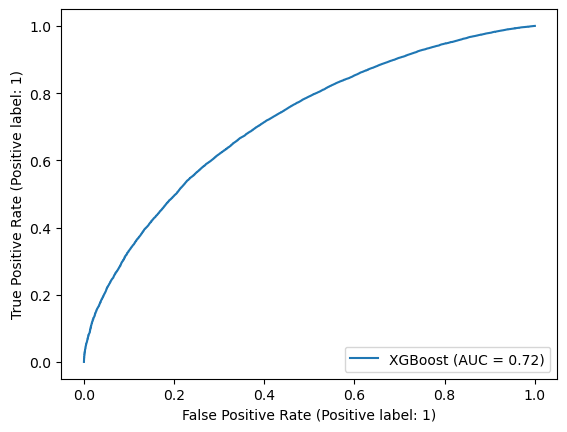

In [192]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_proba_xgb, name="XGBoost")

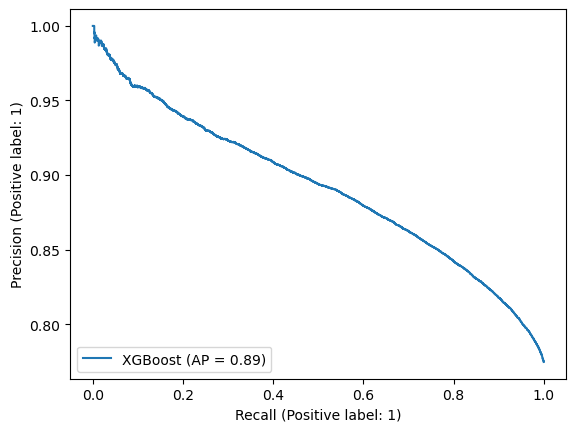

In [193]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_xgb, name="XGBoost")

**Logistic Regression with Bagging** (best parameters)

In [169]:
y_pred_lrb = grid_search_bag_lr.predict(X_test)
y_pred_proba_lrb = grid_search_bag_lr.predict_proba(X_test)[:, 1]

conf_matrix_bag_lr = confusion_matrix(y_test, y_pred_lrb)
print("Confusion Matrix:\n", conf_matrix_bag_lr)

Confusion Matrix:
 [[ 1943 16160]
 [ 1596 60652]]


In [170]:
# Accuracy Score
accuracy_bag_lrb = accuracy_score(y_test, y_pred_lrb)
print("Accuracy Score:", accuracy_bag_lrb)

Accuracy Score: 0.7790195517168423


In [171]:
# Precision, Recall, and F1 Score might require binary classification or specific handling for multiclass cases
# Here's an example for binary classification:
precision_bag_lr = precision_score(y_test, y_pred_lrb)
recall_bag_lr = recall_score(y_test, y_pred_lrb)
f1_bag_lr = f1_score(y_test, y_pred_lrb)
roc_auc = roc_auc_score(y_test, y_pred_proba_lrb)

In [172]:
print("Precision Score:", precision_bag_lr)
print("Recall Score:", recall_bag_lr)
print("F1 Score:", f1_bag_lr)
print(f"ROC AUC score: {roc_auc}")

Precision Score: 0.7896162058011769
Recall Score: 0.974360622028017
F1 Score: 0.8723141090176901
ROC AUC score: 0.7041647014392922


In [173]:
# Classification Report
class_report_bag_lr = classification_report(y_test, y_pred_lrb,target_names=['Not Fully Paid', 'Fully Paid'])
print("Classification Report:\n", class_report_bag_lr)

Classification Report:
                 precision    recall  f1-score   support

Not Fully Paid       0.55      0.11      0.18     18103
    Fully Paid       0.79      0.97      0.87     62248

      accuracy                           0.78     80351
     macro avg       0.67      0.54      0.53     80351
  weighted avg       0.74      0.78      0.72     80351



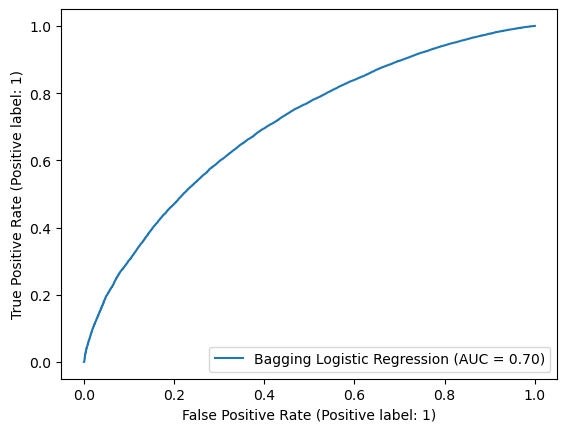

In [174]:
RocCurveDisplay.from_predictions(y_test,y_pred_proba_lrb, name="Bagging Logistic Regression")

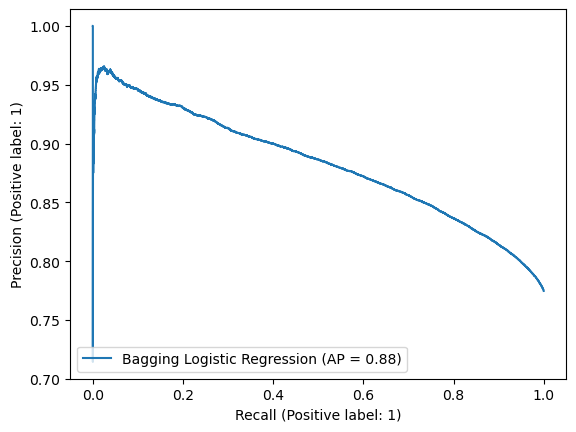

In [175]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_lrb, name="Bagging Logistic Regression")

## Analysis

**ROC AUC Score**
XGBoost leads with the highest ROC AUC score of 0.7188, indicating its superior capability in handling the classification task with nuanced differentiation between positive and negative cases.
**Random Forest** follows with a ROC AUC score of 0.7132, showcasing strong predictive capabilities.

**Gradient Boosting** shows commendable performance with a ROC AUC score of 0.7096.
**Logistic Regression with Bagging** has a ROC AUC score of 0.7042, slightly outperforming the standalone **Logistic Regression** model, which scores 0.7032.

#### Confusion Matrix

Logistic Regression:

* TP: 58010
* TN: 1978
* FP: 16125
* FN: 4238

Random Forest:

* TP: 59375
* TN: 1292
* FP: 16811
* FN: 2873

Gradient Boosting:

* TP: 59075
* TN: 2020
* FP: 16083
* FN: 3173

XGBoost:

* TP: 60472
* TN: 2307
* FP: 15796
* FN: 1776



Logistic Regression with Bagging:

* TP: 58635
* TN: 1943
* FP: 16160
* FN: 3613

### Best Model

**XGBoost** stands out as the best model for predicting loan repayment, with the highest ROC AUC score and a balanced performance in the confusion matrix. 
It demonstrates a strong ability to accurately identify loans that will be repaid, indicated by the highest number of True Positives (TP) and a competitive number of True Negatives (TN), making it well-balanced across all metrics.

### Worst Model

**Random Forest** could be considered the least favorable model for this specific task. 
It has the lowest number of True Negatives (TN) and the highest number of False Positives (FP), indicating a higher risk of incorrectly predicting bad loans as good. This could be particularly problematic for minimizing credit risk, which is a primary objective in loan approval decisions.